In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install numpy

In [4]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import io
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,MaxPool2D,Conv2D
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from keras.applications import VGG16
from keras.applications import VGG19
from keras.applications import ResNet50





In [6]:
train_data=[]
train_labels=[]
test_data=[]
test_labels=[]
val_data=[]
val_labels=[]


In [7]:

for dir in os.listdir('/kaggle/input/chest-xray-pneumonia/chest_xray/train'):
    if 'NORMAL'in dir:
        for root, _, files in os.walk(os.path.join('/kaggle/input/chest-xray-pneumonia/chest_xray/train', dir)):
            for file in files:
                image_path= os.path.join(root, file)
                image=cv2.imread(image_path)
                image=cv2.resize(image,(128,128))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image= np.array(image)
                train_data.append(image)
                train_labels.append(0)
    if 'PNEUMONIA'in dir:
        for root, _, files in os.walk(os.path.join('/kaggle/input/chest-xray-pneumonia/chest_xray/train', dir)):
            for file in files:
                image_path= os.path.join(root, file)
                image=cv2.imread(image_path)
                image=cv2.resize(image,(128,128))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image= np.array(image)
                train_data.append(image)
                train_labels.append(1)

      

In [8]:
train_data=np.array(train_data)
train_data=train_data/255.0  #Normalize pixel values to the range [0, 1]
print(train_data.shape)

(5216, 128, 128, 3)


In [9]:
train_labels=np.array(train_labels)
print(train_labels.shape)

(5216,)


In [10]:

for dir in os.listdir('/kaggle/input/chest-xray-pneumonia/chest_xray/test'):
    if 'NORMAL'in dir:
        for root, _, files in os.walk(os.path.join('/kaggle/input/chest-xray-pneumonia/chest_xray/test', dir)):
            for file in files:
                image_path= os.path.join(root, file)
                image=cv2.imread(image_path)
                image=cv2.resize(image,(128,128))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  #convert into RGB
                image= np.array(image)
                test_data.append(image)
                test_labels.append(0)
    if 'PNEUMONIA'in dir:
        for root, _, files in os.walk(os.path.join('/kaggle/input/chest-xray-pneumonia/chest_xray/test', dir)):
            for file in files:
                image_path= os.path.join(root, file)
                image=cv2.imread(image_path)
                image=cv2.resize(image,(128,128))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image= np.array(image)
                test_data.append(image)
                test_labels.append(1)



In [11]:
test_data=np.array(test_data)
test_data=test_data/255.0   ##Normalize pixel values to the range [0, 1]
print(test_data.shape)

(624, 128, 128, 3)


In [12]:
test_labels=np.array(test_labels)
print(test_labels.shape)

(624,)


In [13]:
val_data=[]
for dir in os.listdir('/kaggle/input/chest-xray-pneumonia/chest_xray/val'):
    if 'NORMAL'in dir:
        for root, _, files in os.walk(os.path.join('/kaggle/input/chest-xray-pneumonia/chest_xray/val', dir)):
            for file in files:
                image_path= os.path.join(root, file)
                image=cv2.imread(image_path)
                image=cv2.resize(image,(128,128))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  #convert into RGB
                image= np.array(image)
                val_data.append(image)
                val_labels.append(0)
    if 'PNEUMONIA'in dir:
        for root, _, files in os.walk(os.path.join('/kaggle/input/chest-xray-pneumonia/chest_xray/val', dir)):
            for file in files:
                image_path= os.path.join(root, file)
                image=cv2.imread(image_path)
                image=cv2.resize(image,(128,128))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image= np.array(image)
                val_data.append(image)
                val_labels.append(1)



In [14]:
val_data=np.array(val_data)
val_data=val_data/255.0   ##Normalize pixel values to the range [0, 1]
print(val_data.shape)

(16, 128, 128, 3)


In [15]:
val_labels=np.array(val_labels)
print(val_labels.shape)

(16,)


**MobileNet**

In [16]:
# Load MobileNet with pre-trained weights and freeze layers
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


for layer in base_model.layers:
    layer.trainable = False

# Create your model
mobilenet_model = Sequential()
mobilenet_model.add(base_model)

mobilenet_model.add(GlobalAveragePooling2D())
mobilenet_model.add(Dense(1024, activation='relu'))
mobilenet_model.add(Dropout(0.5))
mobilenet_model.add(Dense(128, activation='relu'))
mobilenet_model.add(Dropout(0.5))
mobilenet_model.add(Dense(128, activation='relu'))
mobilenet_model.add(Dropout(0.5))

# mobilenet_model.add(Dense(32, activation='relu'))
# mobilenet_model.add(Dropout(0.5))
mobilenet_model.add(Dense(1, activation='sigmoid'))

mobilenet_model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functi  (None, 4, 4, 1024)        3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               131200    
                                                         

In [17]:
metrics = [
        'accuracy',
        tf.keras.metrics.AUC(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.F1Score()]

early_stopping_monitor = EarlyStopping(patience = 25)
mobilenet_model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = metrics)

In [18]:
mobilenet_model_history=mobilenet_model.fit(train_data, train_labels.astype('float32'),epochs=80,batch_size=50,validation_data=(val_data,val_labels.astype('float32')),callbacks = [early_stopping_monitor])

Epoch 1/80
105/105 [==============================] - 14s 33ms/step - loss: 0.3260 - accuracy: 0.8646 - auc: 0.9203 - recall: 0.9203 - precision: 0.8998 - f1_score: 0.8525 - val_loss: 0.3194 - val_accuracy: 0.8125 - val_auc: 1.0000 - val_recall: 1.0000 - val_precision: 0.7273 - val_f1_score: 0.6667
Epoch 2/80
105/105 [==============================] - 2s 22ms/step - loss: 0.1466 - accuracy: 0.9413 - auc: 0.9822 - recall: 0.9585 - precision: 0.9624 - f1_score: 0.8525 - val_loss: 0.1850 - val_accuracy: 0.9375 - val_auc: 1.0000 - val_recall: 1.0000 - val_precision: 0.8889 - val_f1_score: 0.6667
Epoch 3/80
105/105 [==============================] - 2s 22ms/step - loss: 0.1290 - accuracy: 0.9542 - auc: 0.9854 - recall: 0.9670 - precision: 0.9712 - f1_score: 0.8527 - val_loss: 0.2644 - val_accuracy: 0.8125 - val_auc: 1.0000 - val_recall: 1.0000 - val_precision: 0.7273 - val_f1_score: 0.6667
Epoch 4/80
105/105 [==============================] - 2s 22ms/step - loss: 0.1096 - accuracy: 0.9586 -

In [19]:
mobilenet_model.evaluate(test_data, test_labels.astype('float32'))

20/20 [==============================] - 1s 14ms/step - loss: 2.5443 - accuracy: 0.8029 - auc: 0.7919 - recall: 0.9974 - precision: 0.7613 - f1_score: 0.7730


[2.544300079345703,
 0.8028846383094788,
 0.7919132113456726,
 0.9974358677864075,
 0.7612524628639221,
 array([0.77304256], dtype=float32)]

**VGG16**

In [20]:
# Load VGG16 with pre-trained weights and freeze layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in base_model.layers:
    layer.trainable = False

# Create your model
vgg16_model = Sequential()
vgg16_model.add(base_model)
vgg16_model.add(GlobalAveragePooling2D())
vgg16_model.add(Dense(1024, activation='relu'))
vgg16_model.add(Dropout(0.5))
vgg16_model.add(Dense(128, activation='relu'))
vgg16_model.add(Dropout(0.5))
vgg16_model.add(Dense(128, activation='relu'))
vgg16_model.add(Dropout(0.5))

# vgg16_model.add(Dense(32, activation='relu'))
# vgg16_model.add(Dropout(0.5))
vgg16_model.add(Dense(1, activation='sigmoid'))

vgg16_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 global_average_pooling2d_1  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 1024)              525312    
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 128)               131200    
                                                                 
 dropout_4 (Dropout)         (None, 128)               

In [21]:
# Metrics
metrics = [
    'accuracy',
    tf.keras.metrics.AUC(),
    tf.keras.metrics.Recall(),
    tf.keras.metrics.Precision(),
    tf.keras.metrics.F1Score()]

early_stopping_monitor = EarlyStopping(patience = 25)
vgg16_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics)


In [22]:
vgg16_model_history = vgg16_model.fit(
    train_data, 
    train_labels.astype('float32'),
    epochs=50,
    batch_size=100,
    callbacks=[early_stopping_monitor]
)

Epoch 1/50
53/53 [==============================] - 16s 156ms/step - loss: 0.4323 - accuracy: 0.7941 - auc_1: 0.8188 - recall_1: 0.9574 - precision_1: 0.8032 - f1_score: 0.8525
Epoch 2/50
53/53 [==============================] - 7s 138ms/step - loss: 0.2162 - accuracy: 0.9135 - auc_1: 0.9628 - recall_1: 0.9430 - precision_1: 0.9408 - f1_score: 0.8525
Epoch 3/50
53/53 [==============================] - 7s 140ms/step - loss: 0.1740 - accuracy: 0.9354 - auc_1: 0.9751 - recall_1: 0.9597 - precision_1: 0.9536 - f1_score: 0.8525
Epoch 4/50
53/53 [==============================] - 7s 140ms/step - loss: 0.1525 - accuracy: 0.9413 - auc_1: 0.9803 - recall_1: 0.9587 - precision_1: 0.9622 - f1_score: 0.8525
Epoch 5/50
53/53 [==============================] - 7s 140ms/step - loss: 0.1279 - accuracy: 0.9515 - auc_1: 0.9859 - recall_1: 0.9670 - precision_1: 0.9677 - f1_score: 0.8525
Epoch 6/50
53/53 [==============================] - 7s 140ms/step - loss: 0.1270 - accuracy: 0.9530 - auc_1: 0.9858 - r

In [23]:
vgg16_model.evaluate(test_data, test_labels.astype('float32'))

20/20 [==============================] - 3s 41ms/step - loss: 0.7262 - accuracy: 0.8157 - auc_1: 0.9202 - recall_1: 0.9897 - precision_1: 0.7767 - f1_score: 0.7692


[0.7261822819709778,
 0.8157051205635071,
 0.9201676249504089,
 0.9897435903549194,
 0.7766599655151367,
 array([0.7692308], dtype=float32)]

**VGG 19**

In [120]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in base_model.layers:
    layer.trainable = False

# Create your model
vgg19_model = Sequential()
vgg19_model.add(base_model)

vgg19_model.add(GlobalAveragePooling2D())
vgg19_model.add(Dense(1024, activation='relu'))
vgg19_model.add(Dropout(0.5))
vgg19_model.add(Dense(128, activation='relu'))
vgg19_model.add(Dropout(0.5))
vgg19_model.add(Dense(128, activation='relu'))
vgg19_model.add(Dropout(0.5))

# vgg19_model.add(Dense(32, activation='relu'))
# vgg19_model.add(Dropout(0.5))
vgg19_model.add(Dense(1, activation='sigmoid'))

80134624/80134624 [==============================] - 0s 0us/step


In [122]:
# Metrics
metrics = [
    'accuracy',
    tf.keras.metrics.AUC(),
    tf.keras.metrics.Recall(),
    tf.keras.metrics.Precision(),
    tf.keras.metrics.F1Score()]

early_stopping_monitor = EarlyStopping(patience=25)
# Compile Model
vgg19_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics)


In [123]:
vgg19_model_history = vgg19_model.fit(
    train_data, 
    train_labels.astype('float32'),
    epochs=200,
    batch_size=100,
    validation_data=(val_data, val_labels.astype('float32')),
    callbacks=[early_stopping_monitor]
)

Epoch 1/200
53/53 [==============================] - 11s 174ms/step - loss: 0.4548 - accuracy: 0.7891 - auc_3: 0.7986 - recall_3: 0.9492 - precision_3: 0.8029 - f1_score: 0.8525 - val_loss: 0.4361 - val_accuracy: 0.8750 - val_auc_3: 0.9375 - val_recall_3: 1.0000 - val_precision_3: 0.8000 - val_f1_score: 0.6667
Epoch 2/200
53/53 [==============================] - 9s 169ms/step - loss: 0.2422 - accuracy: 0.8988 - auc_3: 0.9523 - recall_3: 0.9406 - precision_3: 0.9244 - f1_score: 0.8525 - val_loss: 0.4732 - val_accuracy: 0.8125 - val_auc_3: 0.9375 - val_recall_3: 1.0000 - val_precision_3: 0.7273 - val_f1_score: 0.6667
Epoch 3/200
53/53 [==============================] - 9s 174ms/step - loss: 0.1896 - accuracy: 0.9258 - auc_3: 0.9702 - recall_3: 0.9561 - precision_3: 0.9447 - f1_score: 0.8525 - val_loss: 0.4036 - val_accuracy: 0.8125 - val_auc_3: 0.9375 - val_recall_3: 1.0000 - val_precision_3: 0.7273 - val_f1_score: 0.6667
Epoch 4/200
53/53 [==============================] - 9s 177ms/step

In [124]:
vgg19_model.evaluate(test_data, test_labels.astype('float32'))


20/20 [==============================] - 1s 51ms/step - loss: 0.7016 - accuracy: 0.8077 - auc_3: 0.9220 - recall_3: 0.9923 - precision_3: 0.7679 - f1_score: 0.7692


[0.7016175985336304,
 0.807692289352417,
 0.9220030307769775,
 0.9923076629638672,
 0.7678571343421936,
 array([0.7692308], dtype=float32)]

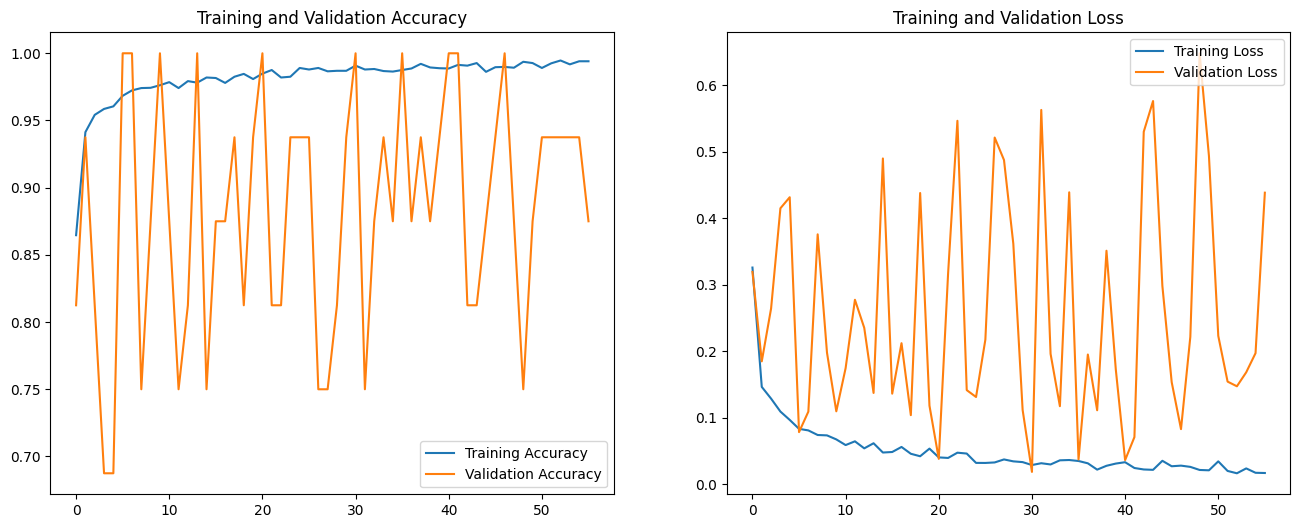

In [24]:
#Getting the accuracy
acc = mobilenet_model_history.history['accuracy']
val_acc =mobilenet_model_history.history['val_accuracy']

#Getting the losses
loss= mobilenet_model_history.history['loss']
val_loss = mobilenet_model_history.history['val_loss']

#No of epochs it trained
epochs_range = mobilenet_model_history.epoch

#Plotting Training and Validation accuracy
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

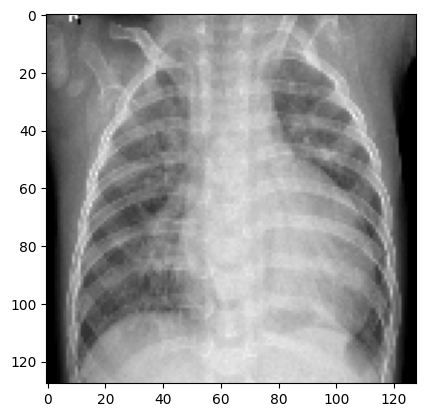

In [32]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(train_data[50])
plt.show()

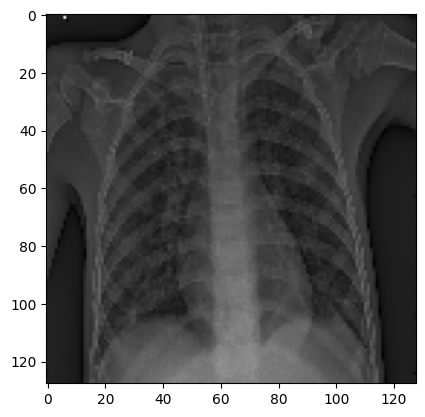

In [33]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(test_data[207])
plt.show()

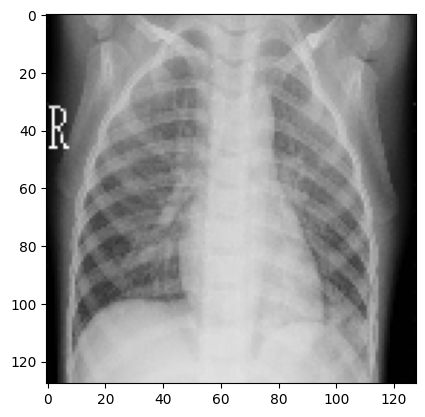

In [35]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(val_data[7])
plt.show()